In [1]:
import sqlite3


In [3]:
conn = sqlite3.connect('../../preproc/tmp/preproc.sqlite3')

In [4]:
c = conn.cursor()
c.execute("select * from task")

In [6]:
columns = [c for c, *_ in c.description]
columns

['id',
 'name',
 'status',
 'meta',
 'type',
 'error',
 'creation_date',
 'submission_date',
 'run_date',
 'done_date']

In [7]:
data = [row for row in c.fetchall()]

In [9]:
values = [dict(zip(columns, row)) for row in data]

In [11]:
values[:2]

[{'creation_date': '2015-08-21 18:46:27.696759',
  'done_date': None,
  'error': None,
  'id': 1,
  'meta': '{"samples": ["GSM1287918", "GSM1287919", "GSM1287920", "GSM1287921", "GSM1287922", "GSM1287923", "GSM1287924", "GSM1287925", "GSM1287926", "GSM1287927", "GSM1287928", "GSM1287929", "GSM1287930", "GSM1287931", "GSM1287932", "GSM1287933", "GSM1287934", "GSM1287935", "GSM1287936", "GSM1287937", "GSM1287939", "GSM1287938", "GSM1287940", "GSM1287941", "GSM1287942", "GSM1287943", "GSM1287944", "GSM1287945", "GSM1287946", "GSM1287949", "GSM1287947", "GSM1287948", "GSM1287950", "GSM1287951", "GSM1287952", "GSM1287954", "GSM1287953", "GSM1287955", "GSM1287956", "GSM1287957", "GSM1287958", "GSM1287959", "GSM1287960", "GSM1287961", "GSM1287962", "GSM1287963", "GSM1287964", "GSM1287965", "GSM1287966", "GSM1287969", "GSM1287968", "GSM1287967", "GSM1287970"], "platform": "GPL570", "accession": "GSE53224"}',
  'name': 'GSE53224_GPL570',
  'run_date': None,
  'status': 'done',
  'submission_dat

In [25]:
import pandas as pd
import numpy as np
import json
data = (
    pd.DataFrame(values)
    .assign(meta=lambda d: d.meta.map(json.loads))
    .assign(samples=lambda d: d.meta.map(lambda m: m.get('samples', [])))
    .assign(platform=lambda d: d.meta.map(lambda m: m.get('platform', np.nan)))
)
data[:10]

,creation_date,done_date,error,id,meta,name,run_date,status,submission_date,type,samples,platform
0,2015-08-21 18:46:27.696759,None,None,1,"{'platform': 'GPL570', 'samples': ['GSM1287918...",GSE53224_GPL570,None,done,None,preproc,"[GSM1287918, GSM1287919, GSM1287920, GSM128792...",GPL570
1,2015-08-21 18:46:27.698587,None,None,2,"{'platform': 'GPL570', 'samples': ['GSM1286097...",GSE53183_GPL570,None,done,None,preproc,"[GSM1286097, GSM1286098, GSM1286099, GSM128610...",GPL570
2,2015-08-21 18:46:27.699732,None,None,3,"{'platform': 'GPL570', 'samples': ['GSM1283115...",GSE53157_GPL570,None,done,None,preproc,"[GSM1283115, GSM1283116, GSM1283117, GSM128311...",GPL570
3,2015-08-21 18:46:27.700555,None,None,4,"{'platform': 'GPL5082', 'samples': ['GSM160323...",GSE65721_GPL5082,None,skip,None,preproc,"[GSM1603234, GSM1603235, GSM1603236, GSM160323...",GPL5082
4,2015-08-21 18:46:27.701362,None,None,5,"{'platform': 'GPL570', 'samples': ['GSM1603354...",GSE65721_GPL570,None,done,None,preproc,"[GSM1603354, GSM1603355, GSM1603356, GSM160335...",GPL570
5,2015-08-21 18:46:27.702123,None,None,6,"{'platform': 'GPL570', 'samples': ['GSM1282316...",GSE53092_GPL570,None,done,None,preproc,"[GSM1282316, GSM1282317, GSM1282318, GSM1282319]",GPL570
6,2015-08-21 18:46:27.702899,None,None,7,"{'platform': 'GPL570', 'samples': ['GSM1603354...",GSE65707_GPL570,None,done,None,preproc,"[GSM1603354, GSM1603355, GSM1603356, GSM160335...",GPL570
7,2015-08-21 18:46:27.703622,None,None,8,"{'platform': 'GPL570', 'samples': ['GSM1281432...",GSE53059_GPL570,None,done,None,preproc,"[GSM1281432, GSM1281433, GSM1281434, GSM128143...",GPL570
8,2015-08-21 18:46:27.704425,None,None,9,"{'platform': 'GPL570', 'samples': ['GSM1281025...",GSE53046_GPL570,None,done,None,preproc,"[GSM1281025, GSM1281026, GSM1281027, GSM128102...",GPL570
9,2015-08-21 18:46:27.705136,None,None,10,"{'platform': 'GPL570', 'samples': ['GSM1280329...",GSE53012_GPL570,None,done,None,preproc,"[GSM1280329, GSM1280330, GSM1280331, GSM128033...",GPL570


In [38]:
import seaborn
%matplotlib inline
(data
 .query("platform == 'GPL570' and type == 'preproc' and status == 'done'")
 .samples.map(len)
 .value_counts()
)

6      459
12     284
4      279
8      224
2      180
9      166
10     140
18     113
24     106
3       85
20      74
16      72
15      72
14      66
5       62
30      53
22      47
11      46
7       43
13      41
17      36
40      35
28      35
21      33
19      32
27      30
36      30
38      24
32      24
26      24
      ... 
95       1
121      1
310      1
306      1
290      1
286      1
116      1
118      1
134      1
138      1
142      1
144      1
146      1
150      1
152      1
168      1
170      1
174      1
184      1
206      1
224      1
228      1
238      1
240      1
258      1
262      1
266      1
278      1
282      1
375      1
dtype: int64

In [82]:
data.query("platform == 'GPL570'").status.value_counts()[:10]

done     3693
error     148
0           1
dtype: int64

In [119]:
data.query("platform=='GPL1261'")['status'].value_counts()

done     3113
error     178
skip       53
dtype: int64

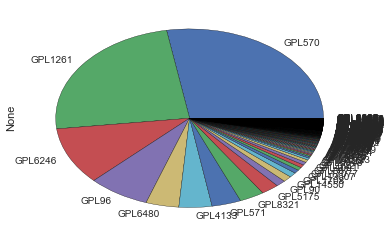

In [78]:
data.platform.value_counts().plot(kind='pie')

In [80]:
(data
 .query("platform == 'GPL1261' and type == 'preproc' and status == 'done'")
 .name.to_csv(path='/Users/nikita/mnt/ls2/preproc/tmp/roshe-genes-corr/to_preroc-1261.txt', index=False)
)

In [45]:
?pd.read_table

In [42]:
!mkdir -p /Users/nikita/mnt/ls2/preproc/tmp/roshe-genes-corr/

In [51]:
drug = pd.read_table('/Users/nikita/Downloads/Archive/mcf7_0.04_mean.txt', skiprows=2, header=None, index_col=0)[1]
drug[:10]

0
1053_at         7.824133
200011_s_at    10.850634
200016_x_at    11.963233
200022_at      12.551167
200026_at      12.250600
200051_at       8.294800
200059_s_at     6.925817
200068_s_at    11.184000
200093_s_at    10.666933
200098_s_at    10.832533
Name: 1, dtype: float64

In [56]:
sample = pd.read_table('../data/roshe-genes-corr/GSM1419638_YX_U133Plus_2_44T.expr', sep=' ', index_col=0)
sample = sample[sample.columns[0]]
sample[:10]

1007_s_at    1056.491141
1053_at        31.206698
117_at         81.808516
121_at        580.714235
1255_g_at      10.769589
1294_at       242.631732
1316_at        98.901776
1320_at        13.167356
1405_i_at      73.611919
1431_at        17.680080
Name: GSM1419638_YX_U133Plus_2_44T.CEL.gz, dtype: float64

In [57]:
drug.shape, sample.shape

((1447,), (54675,))

In [59]:
import scipy
import numpy as np

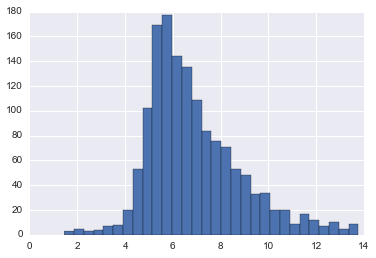

In [63]:
drug.hist(bins=30)

In [64]:
sample = sample.map(np.log2)

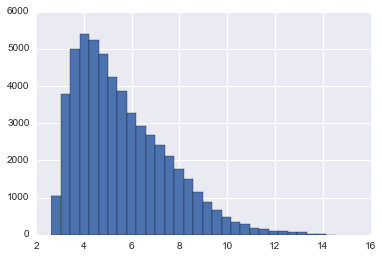

In [66]:
sample.hist(bins=30)

In [69]:
d = pd.DataFrame(dict(sample=sample, drug=drug)).dropna()
d.shape

(1447, 2)

In [70]:
d.corr()

,drug,sample
drug,1.000000,0.608799
sample,0.608799,1.000000


In [71]:
sample.corr(drug)

0.60879946133577012

In [75]:
scipy.stats.pearsonr(d.drug.values, d['sample'].values)

(0.60879946133577023, 1.750566052955432e-147)

In [85]:
pd.read_csv('../data/roshe-genes-corr/out/GSE27716_GPL570.csv', index_col=0)

,sample,drug,corr
0,GSM686305.expr,mcf7_0.04_mean,0.629301
1,GSM686305.expr,mcf7_0.12_mean,0.646768
2,GSM686305.expr,mcf7_1.11_mean,0.645845
3,GSM686305.expr,mcf7_0.37_mean,0.637850
4,GSM686305.expr,mcf7_3.33_mean,0.655625
5,GSM686316.expr,mcf7_0.04_mean,0.592886
6,GSM686316.expr,mcf7_0.12_mean,0.607785
7,GSM686316.expr,mcf7_1.11_mean,0.602812
8,GSM686316.expr,mcf7_0.37_mean,0.597681
9,GSM686316.expr,mcf7_3.33_mean,0.632515


In [96]:
from glob import glob
from os.path import basename
datasets = [pd.read_csv(f, index_col=0).assign(series=basename(f)) for f in glob('../data/roshe-genes-corr/out/*.csv')]

In [101]:
corrs = (pd.concat(datasets)
         .reset_index()
         .dropna()
         .assign(platform=lambda d: d.series
                                     .str.split('_')
                                     .str.get(1)
                                     .str.replace('.csv', ''))
         .assign(series=lambda d: d.series
                                     .str.split('_')
                                     .str.get(0))
        )

In [107]:
(corrs
 .sort(columns=['corr'], ascending=False)
 .drop('index', 1) 
#  .to_csv('../data/roshe-genes-corr/roshe-corrs-GPL570.csv', index=False)
)

,sample,drug,corr,series,platform
575477,GSM1226818_7.27.08_100_E-2.expr,mcf7_1.11_mean,0.819173,GSE50705,GPL570
179822,GSM468596.expr,mcf7_1.11_mean,0.818729,GSE18912,GPL570
179802,GSM468594.expr,mcf7_1.11_mean,0.818379,GSE18912,GPL570
179792,GSM468597.expr,mcf7_1.11_mean,0.818360,GSE18912,GPL570
179797,GSM468593.expr,mcf7_1.11_mean,0.818121,GSE18912,GPL570
179832,GSM468595.expr,mcf7_1.11_mean,0.817425,GSE18912,GPL570
114581,GSM388187.expr,mcf7_0.12_mean,0.815313,GSE15477,GPL570
179821,GSM468596.expr,mcf7_0.12_mean,0.815287,GSE18912,GPL570
574537,GSM1226817_7.27.08_10_E-2.expr,mcf7_1.11_mean,0.814985,GSE50705,GPL570
179791,GSM468597.expr,mcf7_0.12_mean,0.814786,GSE18912,GPL570


In [104]:
corrs.platform.value_counts()

GPL570    512595
dtype: int64